# Ranking atrakcyjności województw pod względem turystycznym w roku 2012 i 2018

Celem projektu jest uporządkowanie województw Polski pod względem atrakcyjności turystycznej przy użyciu metod klasyfikacji wielowymiarowej analizy porównawczej. Jako badane okresy przyjęto rok 2012 oraz 2018. Stworzono rankingi województw w zależności od atrakcyjności turystycznej. Województwa, które uznano za najbardziej atrakcyjne turystycznie zajmują w rankingach wyższe pozycje, niż województwa, które są mało atrakcyjne turystycznie. Badanie tego typu pozwala również porównać dane województwa na przestrzeni czasu.

Dane pobrano ze strony internetowej Głównego Urzędu Statystycznego, a następnie wyodrębniono z nich zmienne, które biorą udział w kształtowaniu atrakcyjności turystycznej regionów. Zmienne dobrano wedle uznania, tak aby opisywały one najważniejsze wielkości wpływające na atrakcyjność turystyczną. Nie zaobserwowano w danych żadnych odchyleń oraz braków.

W badaniu wykorzystano dwie metody porządkowania liniowego: syntetyczny miernik rozwoju (SMR) oraz wskaźnik względnego poziomu rozwoju (BZW), wzięto pod uwagę również podstawowy wskaźnik syntetyczny, przy którym użyte zostały wcześniej zdefiniowane wagi. Dane zostały znormalizowane dwiema metodami: standaryzacją oraz unitaryzacją. Dodatkowo do badania dołączono raport, który zawiera wykresy zestawiające województwa na przestrzeni czasu. 

 
 
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data = pd.read_excel('Dane.xlsx')
data.head()

,Nazwa,POWIERZCHNIA,Unnamed: 2,LUDNOŚĆ NA KM^2,Unnamed: 4,LUDNOŚĆ,Unnamed: 6,APTEKI OGÓLNODOSTĘPNE,Unnamed: 8,DROGI O TWARDEJ NAWIERZCHNI,...,PRZYSTANKI AUTOBUSOWE,Unnamed: 24,PUNKTY GASTRONOMICZNE,Unnamed: 26,LICZBA SKLEPÓW,Unnamed: 28,LICZBA SZPITALI,Unnamed: 30,ŚCIEŻKI ROWEROWE NA 100 KM^2,Unnamed: 32
0,NaN,2012,2018,2012,2018,2012,2018,2012,2018,2012,...,2012,2018,2012,2018,2012,2018,2012,2018,2012,2018
1,NaN,[km2],[km2],[osoba],[osoba],[osoba],[osoba],[ob.],[ob.],[km],...,[km],[km],[ob.],[ob.],[ob.],[ob.],[ob.],[ob.],[km],[km]
2,DOLNOŚLĄSKIE,19947,19947,146,145,2912262,2892315,970,1037,18862,...,3344,4130,277,298,27687,26753,80,82,2.95,4.49
3,KUJAWSKO-POMORSKIE,17972,17972,117,116,2102724,2084752,583,628,16488.6,...,1529,2010.4,101,150,19009,18247,42,41,2.78,5.85
4,LUBELSKIE,25122,25122,86,84,2160492,2110248,805,812,20689.1,...,1883,2461.4,104,99,18382,17779,50,45,1.14,3.03


# <center> Data engineering </center>

Na początku trochę zabawy zestawem danych, tak aby można było przeprowadzić analizę oraz utworzyć ranking. Dane zebrane zostały ze strony Głównego Urzędu Statystycznego. (https://bdl.stat.gov.pl/BDL/dane/podgrup/temat)

In [3]:
data.drop(labels = 1, inplace = True)
data['Nazwa'].fillna(value = 'ROK', inplace = True)
data.set_index('Nazwa', inplace = True)
data.head(5)

,POWIERZCHNIA,Unnamed: 2,LUDNOŚĆ NA KM^2,Unnamed: 4,LUDNOŚĆ,Unnamed: 6,APTEKI OGÓLNODOSTĘPNE,Unnamed: 8,DROGI O TWARDEJ NAWIERZCHNI,Unnamed: 10,...,PRZYSTANKI AUTOBUSOWE,Unnamed: 24,PUNKTY GASTRONOMICZNE,Unnamed: 26,LICZBA SKLEPÓW,Unnamed: 28,LICZBA SZPITALI,Unnamed: 30,ŚCIEŻKI ROWEROWE NA 100 KM^2,Unnamed: 32
Nazwa,,,,,,,,,,,,,,,,,,,,,
ROK,2012,2018,2012,2018,2012,2018,2012,2018,2012,2018,...,2012,2018,2012,2018,2012,2018,2012,2018,2012,2018
DOLNOŚLĄSKIE,19947,19947,146,145,2912262,2892315,970,1037,18862,20223.2,...,3344,4130,277,298,27687,26753,80,82,2.95,4.49
KUJAWSKO-POMORSKIE,17972,17972,117,116,2102724,2084752,583,628,16488.6,18584.5,...,1529,2010.4,101,150,19009,18247,42,41,2.78,5.85
LUBELSKIE,25122,25122,86,84,2160492,2110248,805,812,20689.1,23516.6,...,1883,2461.4,104,99,18382,17779,50,45,1.14,3.03
LUBUSKIE,13988,13988,73,73,1021124,1021124,304,313,8318,8962.5,...,1154,1239.8,39,62,9909,9391,25,24,2.64,4.28


In [4]:
i = 0
for column in data.columns:
    new_name = data.iloc[:,i-1].name + '_2018'
    
    if i % 2 == 1:        
        data.rename(columns = {column:new_name}, inplace = True) 
        
    i += 1
    
    if i > len(data.columns):
        break

data.head()

,POWIERZCHNIA,POWIERZCHNIA_2018,LUDNOŚĆ NA KM^2,LUDNOŚĆ NA KM^2_2018,LUDNOŚĆ,LUDNOŚĆ_2018,APTEKI OGÓLNODOSTĘPNE,APTEKI OGÓLNODOSTĘPNE_2018,DROGI O TWARDEJ NAWIERZCHNI,DROGI O TWARDEJ NAWIERZCHNI_2018,...,PRZYSTANKI AUTOBUSOWE,PRZYSTANKI AUTOBUSOWE_2018,PUNKTY GASTRONOMICZNE,PUNKTY GASTRONOMICZNE_2018,LICZBA SKLEPÓW,LICZBA SKLEPÓW_2018,LICZBA SZPITALI,LICZBA SZPITALI_2018,ŚCIEŻKI ROWEROWE NA 100 KM^2,ŚCIEŻKI ROWEROWE NA 100 KM^2_2018
Nazwa,,,,,,,,,,,,,,,,,,,,,
ROK,2012,2018,2012,2018,2012,2018,2012,2018,2012,2018,...,2012,2018,2012,2018,2012,2018,2012,2018,2012,2018
DOLNOŚLĄSKIE,19947,19947,146,145,2912262,2892315,970,1037,18862,20223.2,...,3344,4130,277,298,27687,26753,80,82,2.95,4.49
KUJAWSKO-POMORSKIE,17972,17972,117,116,2102724,2084752,583,628,16488.6,18584.5,...,1529,2010.4,101,150,19009,18247,42,41,2.78,5.85
LUBELSKIE,25122,25122,86,84,2160492,2110248,805,812,20689.1,23516.6,...,1883,2461.4,104,99,18382,17779,50,45,1.14,3.03
LUBUSKIE,13988,13988,73,73,1021124,1021124,304,313,8318,8962.5,...,1154,1239.8,39,62,9909,9391,25,24,2.64,4.28


In [5]:
i = 0
timely_data_2012 = pd.DataFrame(list(data.index))
timely_data_2018 = pd.DataFrame(list(data.index))
data_timely = data.reset_index()

for column in data.columns:  
    
    if i % 2 == 0:
        timely_data_2012[column] = data_timely[column]
        
    if i % 2 == 1:
        timely_data_2018[column] = data_timely[column]
        
    i += 1
    
    if i > len(data.columns):
        break
        


In [6]:
timely_data_2012.rename(columns = {0:'Nazwa'}, inplace = True)
timely_data_2018.rename(columns = {0:'Nazwa'}, inplace = True)

timely_data_2012 = timely_data_2012.set_index('Nazwa')
timely_data_2018 = timely_data_2018.set_index('Nazwa')

timely_data_2012.drop(axis = 0, labels = 'ROK', inplace = True)
timely_data_2018.drop(axis = 0, labels = 'ROK', inplace = True)

In [7]:
timely_data_2012.head()
timely_data_2018.head()

,POWIERZCHNIA_2018,LUDNOŚĆ NA KM^2_2018,LUDNOŚĆ_2018,APTEKI OGÓLNODOSTĘPNE_2018,DROGI O TWARDEJ NAWIERZCHNI_2018,LICZBA KIN_2018,LESISTOŚĆ_2018,LINIE KOLEJOWE EKSPLOATOWANE_2018,MIEJSCA NOCLEGOWE_2018,OBSZARY CHRONIONE_2018,POMNIKI PRZYRODY_2018,PRZYSTANKI AUTOBUSOWE_2018,PUNKTY GASTRONOMICZNE_2018,LICZBA SKLEPÓW_2018,LICZBA SZPITALI_2018,ŚCIEŻKI ROWEROWE NA 100 KM^2_2018
Nazwa,,,,,,,,,,,,,,,,
DOLNOŚLĄSKIE,19947,145,2892315,1037,20223.2,46,595054,1695,66295,371531,2579,4130,298,26753,82,4.49
KUJAWSKO-POMORSKIE,17972,116,2084752,628,18584.5,18,421942,1200,26110,582482,2492,2010.4,150,18247,41,5.85
LUBELSKIE,25122,84,2110248,812,23516.6,31,587768,1048,18528,569909,1467,2461.4,99,17779,45,3.03
LUBUSKIE,13988,73,1021124,313,8962.5,13,689518,912,11083,536651,1388,1239.8,62,9391,24,4.28
ŁÓDZKIE,18219,135,2459565,906,20805.8,26,391618,1081,20060,355798,2416,3880.1,192,24068,69,4.22


Buduję nowe data frame'y, którymi będę się posługiwał do tworzenia rankingów. 

In [8]:
### Funkcja zrobiona zgodnie z zasadą DRY

def refactor_dataframe(df):
    df.drop(axis = 0, labels = 0, inplace = True)
    df.reset_index(inplace = True)
    df.rename(columns = {0:'Nazwa'}, inplace = True)
    df.set_index('Nazwa', inplace = True)

    

In [9]:
data_2012 = pd.DataFrame(list(data.index))
data_2018 = pd.DataFrame(list(data.index))
refactor_dataframe(data_2012)
refactor_dataframe(data_2018)

In [10]:
data_2012.head()

,index
Nazwa,
DOLNOŚLĄSKIE,1
KUJAWSKO-POMORSKIE,2
LUBELSKIE,3
LUBUSKIE,4
ŁÓDZKIE,5


###### Etap wyłonienia wszystkich zmiennych.

In [11]:
# X1 - liczba aptek na 100 km^2
data_2012['X1'] = pd.to_numeric(timely_data_2012['APTEKI OGÓLNODOSTĘPNE']*100/timely_data_2012['POWIERZCHNIA'])

# X2 - Drogi o twardej nawierzchni w km/100km^2
data_2012['X2'] = pd.to_numeric(timely_data_2012['DROGI O TWARDEJ NAWIERZCHNI']*100/timely_data_2012['POWIERZCHNIA'])

# X3 - Liczba kin na 100 km^2
data_2012['X3'] = pd.to_numeric(timely_data_2012['LICZBA KIN']*100/timely_data_2012['POWIERZCHNIA'])

# X4 - Lesistość w % całej powierzchni
data_2012['X4'] = pd.to_numeric(timely_data_2012['LESISTOŚĆ']/100/timely_data_2012['POWIERZCHNIA'])

# X5 - linie kolejowe w km/100 km^2
data_2012['X5'] = pd.to_numeric(timely_data_2012['LINIE KOLEJOWE EKSPLOATOWANE']*100/timely_data_2012['POWIERZCHNIA'])

# X6 - miejsca noclegowe na 100km^2
data_2012['X6'] = pd.to_numeric(timely_data_2012['MIEJSCA NOCLEGOWE']*100/timely_data_2012['POWIERZCHNIA'])

# X7 - obszary chronione w % powierzchni
data_2012['X7'] = pd.to_numeric(timely_data_2012['OBSZARY CHRONIONE']/100/timely_data_2012['POWIERZCHNIA'])

# X8 - pomniki przyrody na 100 km^2
data_2012['X8'] = pd.to_numeric(timely_data_2012['POMNIKI PRZYRODY']*100/timely_data_2012['POWIERZCHNIA'])

# X9 - punkty gastronomiczne na 100 km^2
data_2012['X9'] = pd.to_numeric(timely_data_2012['PUNKTY GASTRONOMICZNE']*100/timely_data_2012['POWIERZCHNIA'])

# X10 - ścieżki rowerowe na 100 km^2
data_2012['X10'] = pd.to_numeric(timely_data_2012['ŚCIEŻKI ROWEROWE NA 100 KM^2'])

In [12]:
data_2012.head()

,index,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,,
DOLNOŚLĄSKIE,1,4.862887,94.560586,0.180478,0.296448,8.918634,274.146488,0.186003,13.019502,1.388680,2.95
KUJAWSKO-POMORSKIE,2,3.243935,91.746049,0.100156,0.234203,7.099933,100.912531,0.317817,14.884264,0.561985,2.78
LUBELSKIE,3,3.204363,82.354510,0.111456,0.230897,4.159701,50.282621,0.226958,6.022610,0.413980,1.14
LUBUSKIE,4,2.173291,59.465256,0.085788,0.491267,6.941664,77.473549,0.388475,9.222190,0.278810,2.64
ŁÓDZKIE,5,4.742302,105.283495,0.120753,0.211936,5.790658,106.657885,0.196130,18.650859,0.708052,2.06


In [13]:
# X1 - liczba aptek na 100 km^2
data_2018['X1'] = pd.to_numeric(timely_data_2018['APTEKI OGÓLNODOSTĘPNE_2018']*100/timely_data_2018['POWIERZCHNIA_2018'])

# X2 - Drogi o twardej nawierzchni w km/100km^2
data_2018['X2'] = pd.to_numeric(timely_data_2018['DROGI O TWARDEJ NAWIERZCHNI_2018']*100/timely_data_2018['POWIERZCHNIA_2018'])

# X3 - Liczba kin na 100 km^2
data_2018['X3'] = pd.to_numeric(timely_data_2018['LICZBA KIN_2018']*100/timely_data_2018['POWIERZCHNIA_2018'])

# X4 - Lesistość w % całej powierzchni
data_2018['X4'] = pd.to_numeric(timely_data_2018['LESISTOŚĆ_2018']/100/timely_data_2018['POWIERZCHNIA_2018'])

# X5 - linie kolejowe w km/100 km^2
data_2018['X5'] = pd.to_numeric(timely_data_2018['LINIE KOLEJOWE EKSPLOATOWANE_2018']*100/timely_data_2018['POWIERZCHNIA_2018'])

# X6 - miejsca noclegowe na 100km^2
data_2018['X6'] = pd.to_numeric(timely_data_2018['MIEJSCA NOCLEGOWE_2018']*100/timely_data_2018['POWIERZCHNIA_2018'])

# X7 - obszary chronione w % powierzchni
data_2018['X7'] = pd.to_numeric(timely_data_2018['OBSZARY CHRONIONE_2018']/100/timely_data_2018['POWIERZCHNIA_2018'])

# X8 - pomniki przyrody na 100 km^2
data_2018['X8'] = pd.to_numeric(timely_data_2018['POMNIKI PRZYRODY_2018']*100/timely_data_2018['POWIERZCHNIA_2018'])

# X9 - punkty gastronomiczne na 100 km^2
data_2018['X9'] = pd.to_numeric(timely_data_2018['PUNKTY GASTRONOMICZNE_2018']*100/timely_data_2018['POWIERZCHNIA_2018'])

# X10 - ścieżki rowerowe na 100 km^2
data_2018['X10'] = pd.to_numeric(timely_data_2018['ŚCIEŻKI ROWEROWE NA 100 KM^2_2018'])

In [14]:
data_2018.head()

,index,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,,
DOLNOŚLĄSKIE,1,5.198777,101.384669,0.230611,0.298317,8.497518,332.355743,0.186259,12.929263,1.493959,4.49
KUJAWSKO-POMORSKIE,2,3.494325,103.408079,0.100156,0.234778,6.677053,145.281549,0.324105,13.866014,0.834632,5.85
LUBELSKIE,3,3.232227,93.609585,0.123398,0.233965,4.171642,73.752090,0.226856,5.839503,0.394077,3.03
LUBUSKIE,4,2.237632,64.072777,0.092937,0.492936,6.519874,79.232199,0.383651,9.922791,0.443237,4.28
ŁÓDZKIE,5,4.972831,114.198364,0.142708,0.214950,5.933366,110.104836,0.195290,13.260881,1.053845,4.22


In [15]:
data_2012.drop(columns = 'index', inplace = True)
data_2018.drop(columns = 'index', inplace = True)

# <center> Opis wydobytych zmiennych </center>

<center> Wszystkie zmienne są stymulantami. </center>

- <b> X1 – Liczba aptek [szt/100km^2] </b> 

Liczba aptek na 100 kilometrów kwadratowych powierzchni województwa. Im więcej aptek, tym turyści czują się o wiele bezpieczniej, gdyż w razie zachorowania bądź innych nieprzewidywalnych uszkodzeń. Dostęp do tego typu punktów jest bardzo ważny pod względem turystycznym.


- <b> X2 – Drogi o twardej nawierzchni [km/100km^2] </b>

Drogi w kilometrach na 100 kilometrów kwadratowych powierzchni województwa. Im większa długość dróg o twardej nawierzchni tym dostęp do danego terenu jest znacznie ułatwiony - szczególnie dla turystów poruszających się samochodem.


- <b> X3 – Liczba kin [szt/100km^2] </b>

Liczba kin na 100 kilometrów kwadratowych powierzchni województwa. Większa liczba kin sprawia, że turyści posiadają dodatkowe warianty spędzania wolnego czasu.
 
- <b> X4 – Lesistość  [%] </b>

Procent jaki stanowi powierzchnia lasów w ogólnej powierzchni województwa. Procentowa lesistość względem powierzchni jest zmienną określającą walory przyrodnicze. Im więcej walorów przyrodniczych posiada dana kraina tym lepiej dla turystyki.
 
- <b> X5 – Linie kolejowe [km/100km^2] </b>

Linie kolejowe w kilometrach na 100 kilometrów kwadratowych powierzchni województwa. Większa liczba linii kolejowych ułatwia dostęp do danego terenu, a także poruszania się po nim. Duża liczba linii kolejowych zachęca turystów do podróżowania.
 
- <b> X6 – Miejsca noclegowe [szt/100km^2] </b>

Liczba miejsc noclegowych na 100 kilometrów kwadratowych powierzchni województwa. Im więcej miejsc noclegowych posiada dana kraina w stosunku powierzchniowym, tym staje się ona bardziej atrakcyjna turystycznie. Baza noclegowa stanowi podstawę turystyki. Podczas podróży w dalsze rejony wymagany jest wynajem miejsca noclegowego.

- <b> X7 – Obszary chronione [%] </b>

Procent jaki stanowią obszary chronione w ogólnej powierzchni województwa. Obszarami chronionymi są chociażby parki narodowe czy też rezerwaty przyrody. Jak wiadomo tego typu obiekty przyciągają turystów dlatego większa ich ilość zwiększa atrakcyjność regionu pod względem turystycznym. 
 
- <b> X8 – Pomniki przyrody [szt/100km^2] </b>

Liczba pomników przyrody na 100 kilometrów kwadratowych powierzchni województwa. Im więcej pomników przyrody posiada dane województwo, tym staje się ono atrakcyjniejsze turystycznie.
 
- <b> X9 – Punkty gastronomiczne [szt/100km^2] </b>

Liczba punktów gastronomicznych na 100 kilometrów kwadratowych powierzchni województwa. Duża liczba punktów tego typu ułatwia restaurowanie się podczas podróży. Poza tym większa liczba restauracji/barów wprowadza konkurencję, która jest korzystna dla klientów-turystów.

- <b> X10 – Ścieżki rowerowe [km/100km^2] </b>

Ścieżki rowerowe w kilometrach na 100 kilometrów kwadratowych powierzchni województwa. Jazda na rowerze jest to jedna z form aktywnego spędzania wolnego czasu. Województwa posiadające dużo ścieżek rowerowych będą atrakcyjniejsze turystycznie, niż województwa posiadające małą ich ilość. 


# <center> Krótkie podsumowanie wyboru zmiennych</center>

Atrakcyjność turystyczna zależy od wielu czynników: począwszy od takich określających co turyści mogą robić w wolnym czasie, aż po kwestie walorów przyrodniczych prezentowanych przez dany region. Za najważniejszy element atrakcyjności turystycznej uznałbym lesistość, ilość pomników przyrody, a także występowanie obszarów chronionych, gdyż to najczęściej przyciąga turystów. W związku z tym w analizie wykorzystano zmienne opisujące dokładnie te zmienne w odniesieniu do powierzchni danego województwa. Ważnym elementem turystyki jest również kwestia samego podróżowania/przemieszczania się.  Ze względu na to jako zmienne przyjęto również długość dróg o twardej nawierzchni, a także długość linii kolejowych. Obie te wielkości przedstawiono w odniesieniu do powierzchni województwa. Warto także wspomnieć o zmiennych, które określają warianty spędzania wolnego czasu przez turystów. W turystyce bardzo często wykorzystuje się czas wolny na aktywne spędzanie wolnego czasu. W związku z tym uznano, że dodatkowymi wartościowymi zmiennymi będą: liczba kin w odniesieniu do powierzchni województwa, a także długość ścieżek rowerowych również odnosząc się do wielkości powierzchniowej całego województwa. 


# <center> Wstępna analiza danych / EDA </center>

In [16]:
data_mixed = data_2012.append(data_2018)
data_mixed.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,
ŚLĄSKIE,12.040866,176.290440,0.413525,0.320095,15.754480,358.534014,0.220488,12.097624,3.737939,7.57
ŚWIĘTOKRZYSKIE,3.518060,124.946631,0.145163,0.283761,6.156605,127.700453,0.650220,6.139527,2.057894,2.36
WARMIŃSKO-MAZURSKIE,1.787118,57.266372,0.082737,0.315532,4.484342,98.274935,0.466844,9.920159,0.281306,2.29
WIELKOPOLSKIE,4.412258,99.815597,0.150875,0.257946,6.276403,104.073627,0.316189,12.770737,0.861664,6.12
ZACHODNIOPOMORSKIE,2.511246,61.227235,0.122287,0.356853,5.092370,279.468926,0.217633,11.984103,0.755557,3.70


Sprawdzenie czy nie występują żadne braki danych

In [17]:
data_mixed.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
dtype: int64

In [18]:
data_mixed.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,4.167260,96.855591,0.155890,0.301957,6.747144,171.123158,0.335828,11.243555,1.437100,3.357813
std,2.410595,33.850062,0.087645,0.069813,2.871094,132.538904,0.127941,3.205928,1.607487,1.708251
min,1.605097,53.320233,0.054491,0.211936,3.467578,43.206024,0.186003,5.839503,0.235800,0.900000
25%,3.031084,68.154380,0.100156,0.251360,5.114155,84.674483,0.225598,9.602323,0.435923,2.232500
50%,3.539407,92.705182,0.130760,0.291556,6.216504,109.437154,0.317154,11.999138,0.732175,2.990000
75%,4.772448,106.149752,0.164061,0.328462,7.113134,228.965778,0.403095,13.079847,1.634943,4.320000
max,12.040866,176.290440,0.413525,0.492936,16.832887,600.698149,0.650220,18.650859,6.414871,7.570000


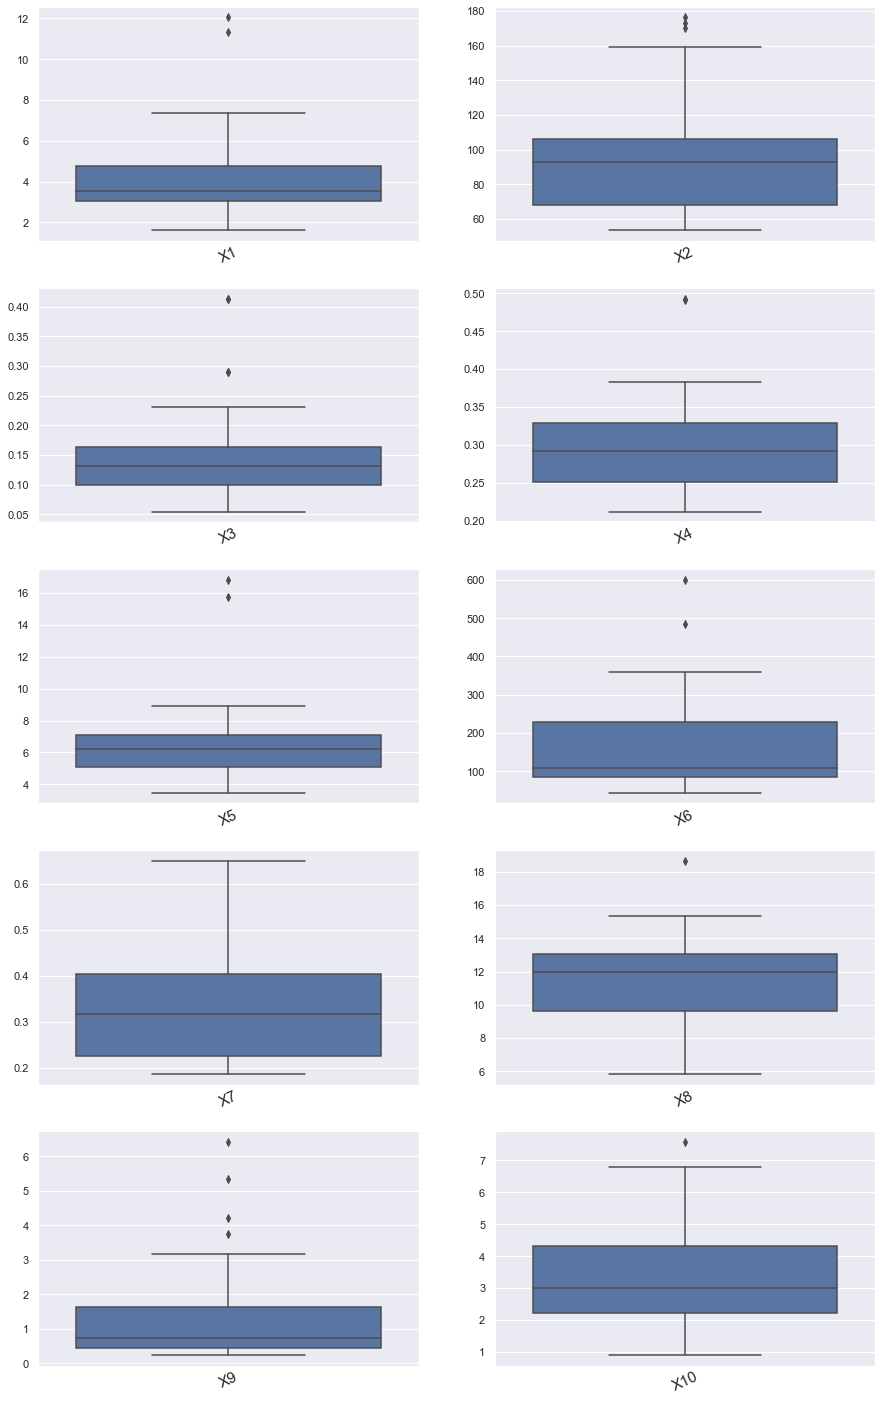

In [19]:
sns.set(style = 'darkgrid')
fig, axes = plt.subplots(5, 2, figsize = (15,25))

for col, ax in zip(data_mixed.columns, fig.get_axes()):
    sns.boxplot(data = data_mixed[col], ax = ax)
    ax.set_xlabel(col, size = 15, rotation = 25)       
    ax.set_xticks([])

### <center> Zastępowanie wartości odstających </center>


In [20]:
for col in data_mixed.columns:
    Q1 = data_mixed[col].quantile(0.25)
    Q3 = data_mixed[col].quantile(0.75)

    IQR=Q3-Q1

    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    
    data_mixed.loc[data_mixed[col] < Lower_Whisker, col] = Lower_Whisker
    data_mixed.loc[data_mixed[col] > Upper_Whisker, col] = Upper_Whisker

In [21]:
data_mixed.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,
DOLNOŚLĄSKIE,4.862887,94.560586,0.180478,0.296448,8.918634,274.146488,0.186003,13.019502,1.388680,2.95
KUJAWSKO-POMORSKIE,3.243935,91.746049,0.100156,0.234203,7.099933,100.912531,0.317817,14.884264,0.561985,2.78
LUBELSKIE,3.204363,82.354510,0.111456,0.230897,4.159701,50.282621,0.226958,6.022610,0.413980,1.14
LUBUSKIE,2.173291,59.465256,0.085788,0.444116,6.941664,77.473549,0.388475,9.222190,0.278810,2.64
ŁÓDZKIE,4.742302,105.283495,0.120753,0.211936,5.790658,106.657885,0.196130,18.296132,0.708052,2.06


In [22]:
data_2012 = data_mixed.iloc[:16]
data_2018 = data_mixed.iloc[16:32]

In [23]:
print(data_2012.shape)
data_2012.head()

(16, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,
DOLNOŚLĄSKIE,4.862887,94.560586,0.180478,0.296448,8.918634,274.146488,0.186003,13.019502,1.388680,2.95
KUJAWSKO-POMORSKIE,3.243935,91.746049,0.100156,0.234203,7.099933,100.912531,0.317817,14.884264,0.561985,2.78
LUBELSKIE,3.204363,82.354510,0.111456,0.230897,4.159701,50.282621,0.226958,6.022610,0.413980,1.14
LUBUSKIE,2.173291,59.465256,0.085788,0.444116,6.941664,77.473549,0.388475,9.222190,0.278810,2.64
ŁÓDZKIE,4.742302,105.283495,0.120753,0.211936,5.790658,106.657885,0.196130,18.296132,0.708052,2.06


In [24]:
print(data_2018.shape)
data_2018.head()

(16, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,
DOLNOŚLĄSKIE,5.198777,101.384669,0.230611,0.298317,8.497518,332.355743,0.186259,12.929263,1.493959,4.49
KUJAWSKO-POMORSKIE,3.494325,103.408079,0.100156,0.234778,6.677053,145.281549,0.324105,13.866014,0.834632,5.85
LUBELSKIE,3.232227,93.609585,0.123398,0.233965,4.171642,73.752090,0.226856,5.839503,0.394077,3.03
LUBUSKIE,2.237632,64.072777,0.092937,0.444116,6.519874,79.232199,0.383651,9.922791,0.443237,4.28
ŁÓDZKIE,4.972831,114.198364,0.142708,0.214950,5.933366,110.104836,0.195290,13.260881,1.053845,4.22


In [25]:
print(data_mixed.shape)
data_mixed.head()

(32, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,
DOLNOŚLĄSKIE,4.862887,94.560586,0.180478,0.296448,8.918634,274.146488,0.186003,13.019502,1.388680,2.95
KUJAWSKO-POMORSKIE,3.243935,91.746049,0.100156,0.234203,7.099933,100.912531,0.317817,14.884264,0.561985,2.78
LUBELSKIE,3.204363,82.354510,0.111456,0.230897,4.159701,50.282621,0.226958,6.022610,0.413980,1.14
LUBUSKIE,2.173291,59.465256,0.085788,0.444116,6.941664,77.473549,0.388475,9.222190,0.278810,2.64
ŁÓDZKIE,4.742302,105.283495,0.120753,0.211936,5.790658,106.657885,0.196130,18.296132,0.708052,2.06


# <center> Wstępna analiza </center>

Wstępna analiza danych polegała na analizie podstawowych statystyk opisowych, takich jak: średnia, odchylenie standardowe, współczynnik zmienności, wartości minimalne oraz maksymalne, czy też rozstęp. Dodatkowo obliczono kwartyle, a także wyznaczono "wąsy", które określają minimalną oraz maksymalną odległość od pudełka. Wartości przekraczające taką granicę nazywa się wartościami odstającymi.  Wartości, które odbiegają od reszty należy usunąć bądź zastąpić, gdyż uniemożliwiają one analizę. W przypadku niniejszej pracy zdecydowano, że wartości odbiegające w górę zostaną zastąpione wartością wąsa górnego, a odbiegające w dół wartością wąsa górnego.
Wartości odstające oznaczone zostały kolejno kolorem czerwonym (początkowe wartości) oraz zielonym (wartości zmienione).



# <center> Ustalenie wag i korelacja </center>

In [26]:
corr = abs(data_mixed.corr())

In [27]:
corr

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,1.000000,0.925978,0.925773,0.262459,0.620303,0.767292,0.078990,0.423902,0.786715,0.422730
X2,0.925978,1.000000,0.828239,0.345107,0.557597,0.629837,0.135958,0.197846,0.718861,0.318871
X3,0.925773,0.828239,1.000000,0.126900,0.589038,0.803399,0.043520,0.300272,0.826942,0.422009
X4,0.262459,0.345107,0.126900,1.000000,0.087557,0.130831,0.215971,0.088850,0.139783,0.033743
X5,0.620303,0.557597,0.589038,0.087557,1.000000,0.537041,0.160245,0.235768,0.353150,0.466487
X6,0.767292,0.629837,0.803399,0.130831,0.537041,1.000000,0.016847,0.502270,0.692124,0.337998
X7,0.078990,0.135958,0.043520,0.215971,0.160245,0.016847,1.000000,0.291268,0.062123,0.358060
X8,0.423902,0.197846,0.300272,0.088850,0.235768,0.502270,0.291268,1.000000,0.344562,0.318939
X9,0.786715,0.718861,0.826942,0.139783,0.353150,0.692124,0.062123,0.344562,1.000000,0.467809
X10,0.422730,0.318871,0.422009,0.033743,0.466487,0.337998,0.358060,0.318939,0.467809,1.000000


In [28]:
corr_sums = corr.sum()

In [29]:
# Waga na podstawie korelacji
weight_1 = 1/corr_sums
weight_1_sum = weight_1.sum()
weight_1 = weight_1/weight_1_sum


# Stała waga
weight_2 = 1/10

In [30]:
weight_1

X1     0.065928
X2     0.072405
X3     0.069840
X4     0.168512
X5     0.088923
X6     0.075621
X7     0.173377
X8     0.110616
X9     0.075979
X10    0.098799
dtype: float64

<b> Korelacja zmiennych:</b>

Korelacja określa  wzajemne powiązania pomiędzy danymi cechami, dlatego zawsze warto jest sprawdzić jak kształtuje się korelacja poszczególnych zmiennych. Charakteryzując korelację dwóch cech należy wziąć pod uwagę kierunek oraz siłę. Wśród korelacji można wyróżnić korelację dodatnią oraz ujemną. W obecnym przypadku korelację dodatnią wykazuje chociażby powiązanie pomiędzy zmienną X6 - miejsca noclegowe na 100km^2, a X2 - drogi o twardej nawierzchni. Oznacza to, że wzrostowi wartości zmiennej X6 towarzyszy wzrost średnich wartości zmiennej X2. Przeciwieństwem korelacji dodatniej jest korelacja ujemna. Ten typ korelacji wykazuje powiązanie pomiędzy zmienną X4 - lesistość w % całej powierzchni, a zmienna X9 - punkty gastronomiczne na 100 km^2. W przypadku korelacji ujemnej wzrostowi wartości jednej zmiennej towarzyszy spadek średnich wartości drugiej. Najsilniejsze powiązania można wskazać pomiędzy zmiennymi: X1 i X2, X1 i X3, X2 i X3. Wszystkie te trzy przypadki są ze sobą silnie skorelowane - ich korelacja jest większa niż 0,82. 

<b> Ustalenie wag: </b>

Ustalono dwie wagi: jedną na podstawie współczynnika korelacji, a drugą jako iloraz jedności do ilości wszystkich zmiennych. Zmiennej mającej znaczenie, ale o dużym współczynniku korelacji metoda pierwsza przyporządkowuje mniejszą wagę. Natomiast poprzez drugą wagę oznaczono, że każda ze zmiennych ma taki sam wpływ na badane zjawisko. 

# <center> Normalizacja </center>

Normalizacja:

Badanie zakłada zbudowanie rankingu województw pod względem atrakcyjności turystycznej. W związku z tym należy surowe dane poddać normalizacji. W tym celu skorzystano z dwóch metod normalizacyjnych: standaryzacji oraz unitaryzacji. 


a) Standaryzacja 
Jest to rodzaj normalizacji, w wyniku której uzyskuje się średnią równą zero, a odchylenie standardowe równe 1. Standaryzacja jest najbardziej powszechnym sposobem normalizacji zmiennych. Wzór standaryzacji:

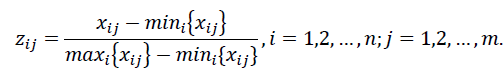

- x - obserowowana wartość zmiennej
- μ - wartość oczekiwana, średnia
- σ - odchylenie standardowe

b) Unitaryzacja
Jest to rodzaj normalizacji, w wyniku której uzyskuje się zmienne o ujednoliconym zakresie zmienności z wartościami należącymi do przedziału [0;1]. Wzór unitaryzacji:

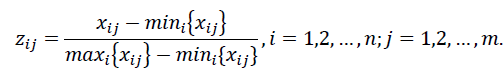

- x - obserwowana wartość zmiennej 


In [31]:
scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

uni_data_mixed = pd.DataFrame(scalerMinMax.fit_transform(data_mixed), columns = data_mixed.columns, index = data_mixed.index)
stand_data_mixed = pd.DataFrame(scalerStandard.fit_transform(data_mixed), columns = data_mixed.columns, index = data_mixed.index)

In [32]:
uni_data_mixed.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,
DOLNOŚLĄSKIE,0.563690,0.375518,0.613296,0.363991,0.820445,0.574198,0.000000,0.576400,0.360537,0.312917
KUJAWSKO-POMORSKIE,0.283566,0.349890,0.222294,0.095905,0.546710,0.143478,0.283949,0.726100,0.102007,0.286968
LUBELSKIE,0.276718,0.264374,0.277303,0.081665,0.104172,0.017595,0.088224,0.014700,0.055722,0.036634
LUBUSKIE,0.098314,0.055954,0.152352,1.000000,0.522889,0.085201,0.436158,0.271557,0.013450,0.265598
ŁÓDZKIE,0.542826,0.473156,0.322559,0.000000,0.349650,0.157763,0.021816,1.000000,0.147686,0.177065


In [33]:
stand_data_mixed.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,
DOLNOŚLĄSKIE,0.589619,-0.043213,0.618942,-0.041183,1.520612,0.964035,-1.189784,0.570952,0.121147,-0.241665
KUJAWSKO-POMORSKIE,-0.400753,-0.133421,-0.759857,-1.062274,0.439424,-0.566091,-0.143026,1.166739,-0.602001,-0.343331
LUBELSKIE,-0.424961,-0.434426,-0.565879,-1.116514,-1.308496,-1.013291,-0.864551,-1.664537,-0.731469,-1.324103
LUBUSKIE,-1.055705,-1.168044,-1.006495,2.381258,0.345336,-0.773121,0.418081,-0.642279,-0.849708,-0.427055
ŁÓDZKIE,0.515853,0.300464,-0.406289,-1.427560,-0.338918,-0.515344,-1.109362,2.256822,-0.474230,-0.773914


In [34]:
stand_data_2012 = stand_data_mixed.iloc[:16]
stand_data_2018 = stand_data_mixed.iloc[16:32]
uni_data_2012 = uni_data_mixed.iloc[:16]
uni_data_2018 = uni_data_mixed.iloc[16:32]

In [35]:
print(stand_data_2012.shape)
print(stand_data_2018.shape)
print(uni_data_2012.shape)
print(uni_data_2012.shape)

(16, 10)
(16, 10)
(16, 10)
(16, 10)


In [36]:
uni_data_2012

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Nazwa,,,,,,,,,,
DOLNOŚLĄSKIE,0.563690,0.375518,0.613296,0.363991,0.820445,0.574198,0.000000,0.576400,0.360537,0.312917
KUJAWSKO-POMORSKIE,0.283566,0.349890,0.222294,0.095905,0.546710,0.143478,0.283949,0.726100,0.102007,0.286968
LUBELSKIE,0.276718,0.264374,0.277303,0.081665,0.104172,0.017595,0.088224,0.014700,0.055722,0.036634
LUBUSKIE,0.098314,0.055954,0.152352,1.000000,0.522889,0.085201,0.436158,0.271557,0.013450,0.265598
ŁÓDZKIE,0.542826,0.473156,0.322559,0.000000,0.349650,0.157763,0.021816,1.000000,0.147686,0.177065
MAŁOPOLSKIE,0.989529,0.963988,1.000000,0.319205,0.592327,1.000000,0.721368,0.698142,0.916985,0.112956
MAZOWIECKIE,0.493548,0.411357,0.556147,0.074325,0.202752,0.184499,0.238768,0.495694,1.000000,0.238122
OPOLSKIE,0.279302,0.337629,0.407107,0.230121,0.790986,0.037761,0.185860,0.095005,0.006002,0.341919
PODKARPACKIE,0.304011,0.312005,0.525786,0.714875,0.341721,0.163013,0.562137,0.155592,0.103248,0.135852


# <center> SMR </center>

Klasyfikacja województw na podstawie wskaźnika SMR. 

W moim przypadku wszystkie zmienne są stymulantami, więc nie trzeba ich przekształcać.

# Refactor?

In [37]:
def refactor_dataframe(df):
    df.drop(axis = 0, labels = 0, inplace = True)
    df.reset_index(inplace = True)
    df.rename(columns = {0:'Nazwa'}, inplace = True)
    df.set_index('Nazwa', inplace = True)


In [38]:
# Funkcja stworzona na potrzeby obliczenia SMR - syntetycznego miernika rozwoju
# przyjmuje ona jako argumenty dataframe, wagę i dataframe z metody normalizacji, którą zadeklarowałem wcześniej
# zwraca dataframe z rankingiem

def smr_fun(df, weight, max_df):
    max_val = max_df.max()
    temp_df = pd.DataFrame(list(df.index))

    temp_df.reset_index(inplace = True)
    temp_df.rename(columns = {0:'Nazwa'}, inplace = True)
    temp_df.set_index('Nazwa', inplace = True)
    temp_df.drop(columns = 'index', inplace = True)

    temp_df['Odległość'] = (weight*(df-max_val)**2).sum(axis=1) ** (1/2)
    temp_df['zi'] = 1-(temp_df/temp_df.max())
    temp_df['Ranking'] = temp_df['zi'].rank(ascending = False)
    
    return temp_df
    

In [39]:
# Rankingi standaryzacji
smr_stand_2012_w1 = smr_fun(stand_data_2012, weight_1, stand_data_mixed)
smr_stand_2012_w2 = smr_fun(stand_data_2012, weight_2, stand_data_mixed)
smr_stand_2018_w1 = smr_fun(stand_data_2018, weight_1, stand_data_mixed)
smr_stand_2018_w2 = smr_fun(stand_data_2018, weight_2, stand_data_mixed)

# Rankingi unitaryzacji
smr_uni_2012_w1 = smr_fun(uni_data_2012, weight_1, uni_data_mixed)
smr_uni_2012_w2 = smr_fun(uni_data_2012, weight_2, uni_data_mixed)
smr_uni_2018_w1 = smr_fun(uni_data_2018, weight_1, uni_data_mixed)
smr_uni_2018_w2 = smr_fun(uni_data_2018, weight_2, uni_data_mixed)

In [40]:
smr_stand_2012_w1.sort_values(by = 'Ranking').head(3)

,Odległość,zi,Ranking
Nazwa,,,
MAŁOPOLSKIE,1.704345,0.487594,1.0
ŚLĄSKIE,1.847363,0.444595,2.0
POMORSKIE,2.159277,0.350820,3.0


# <center> BZW </center>
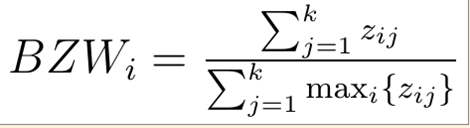

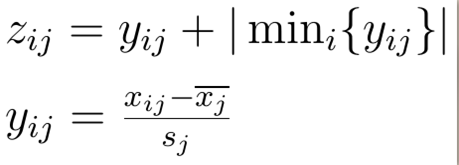

In [41]:
def bzw(df, min_df):
    min_val = abs(min_df.min())
    temp_df = pd.DataFrame(list(df.index))

    temp_df.reset_index(inplace = True)
    temp_df.rename(columns = {0:'Nazwa'}, inplace = True)
    temp_df.set_index('Nazwa', inplace = True)
    temp_df.drop(columns = 'index', inplace = True)

    # BZW - obliczenia
    temp_df = df + min_val
    summax = temp_df.max().sum()
    temp_df['Ezij'] = temp_df.sum(axis = 1)
    temp_df = temp_df.iloc[:,-1:]
    temp_df['BZW'] = temp_df['Ezij']/summax
    temp_df['Ranking'] = temp_df['BZW'].rank(ascending = False)
    
    return temp_df

In [42]:
# Bzw ze standaryzacją
bzw_stand_2012 = bzw(stand_data_2012, stand_data_mixed)
bzw_stand_2018 = bzw(stand_data_2018, stand_data_mixed)

# Bzw z unitaryzacją
bzw_uni_2012 = bzw(uni_data_2012, uni_data_mixed)
bzw_uni_2018 = bzw(uni_data_2018, uni_data_mixed)

In [43]:
bzw_stand_2018.sort_values(by = 'Ranking').head(5)

,Ezij,BZW,Ranking
Nazwa,,,
ŚLĄSKIE,28.079271,0.795623,1.0
MAŁOPOLSKIE,27.430795,0.777248,2.0
POMORSKIE,20.205731,0.572527,3.0
DOLNOŚLĄSKIE,19.238079,0.545109,4.0
MAZOWIECKIE,17.290541,0.489925,5.0


In [44]:
bzw_stand_2012.sort_values(by = 'Ranking').head(10)

,Ezij,BZW,Ranking
Nazwa,,,
ŚLĄSKIE,26.022545,0.747549,1.0
MAŁOPOLSKIE,25.971013,0.746069,2.0
DOLNOŚLĄSKIE,16.672577,0.478953,3.0
POMORSKIE,14.816626,0.425637,4.0
MAZOWIECKIE,13.476430,0.387137,5.0
PODKARPACKIE,12.191350,0.350221,6.0
WIELKOPOLSKIE,12.067084,0.346651,7.0
ŁÓDZKIE,11.830638,0.339859,8.0
KUJAWSKO-POMORSKIE,11.398524,0.327445,9.0


# <center> Wskaźnik syntetyczny oparty na wagach </center>

In [45]:
def syn_measure(df, weight):
    
    temp_df = pd.DataFrame(list(df.index))

    temp_df.reset_index(inplace = True)
    temp_df.rename(columns = {0:'Nazwa'}, inplace = True)
    temp_df.set_index('Nazwa', inplace = True)
    temp_df.drop(columns = 'index', inplace = True)
    
    # Syntetyczny miernik obliczenia
    temp_df['W'] = (weight*df).sum(axis=1)
    temp_df['Ranking'] = temp_df['W'].rank(ascending = False)
    
    return temp_df

In [46]:
# Standaryzacja
smeas_stand_2012_w1 = syn_measure(stand_data_2012, weight_1)
smeas_stand_2012_w2 = syn_measure(stand_data_2012, weight_2)
smeas_stand_2018_w1 = syn_measure(stand_data_2018, weight_1)
smeas_stand_2018_w2 = syn_measure(stand_data_2018, weight_2)

# Rankingi unitaryzacji
smeas_uni_2012_w1 = syn_measure(uni_data_2012, weight_1)
smeas_uni_2012_w2 = syn_measure(uni_data_2012, weight_2)
smeas_uni_2018_w1 = syn_measure(uni_data_2018, weight_1)
smeas_uni_2018_w2 = syn_measure(uni_data_2018, weight_2)

In [47]:
smeas_stand_2012_w1.sort_values(by = 'Ranking').head(5)

,W,Ranking
Nazwa,,
MAŁOPOLSKIE,1.027854,1.0
ŚLĄSKIE,0.892774,2.0
POMORSKIE,0.221212,3.0
DOLNOŚLĄSKIE,0.122353,4.0
LUBUSKIE,0.043735,5.0


# <center> Zestawienie rankingów oraz ich skorelowanie</center>

In [48]:
all_rankings_2012 = pd.concat([smr_stand_2012_w1['Ranking'], smr_stand_2012_w2['Ranking'],
                               smr_uni_2012_w1['Ranking'], smr_uni_2012_w2['Ranking'],
                               bzw_stand_2012['Ranking'], bzw_uni_2012['Ranking'],
                               smeas_stand_2012_w1['Ranking'], smeas_stand_2012_w2['Ranking'], 
                               smeas_uni_2012_w1['Ranking'], smeas_uni_2012_w2['Ranking']],                            
                               axis = 1, )                                                     
                    
all_rankings_2012.columns = ['smr_stand_w1', 'smr_stand_w2',
                             'smr_uni_w1', 'smr_uni_w2',
                             'bzw_stand', 'bzw_uni',
                             'smeas__stand_w1', 'smeas_stand_w2',
                             'smeas_uni_w1', 'smeas_uni_w2']

In [49]:
all_rankings_2012.head()

,smr_stand_w1,smr_stand_w2,smr_uni_w1,smr_uni_w2,bzw_stand,bzw_uni,smeas__stand_w1,smeas_stand_w2,smeas_uni_w1,smeas_uni_w2
Nazwa,,,,,,,,,,
DOLNOŚLĄSKIE,4.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0
KUJAWSKO-POMORSKIE,8.0,8.0,10.0,8.0,9.0,10.0,10.0,9.0,10.0,10.0
LUBELSKIE,16.0,16.0,16.0,15.0,16.0,16.0,16.0,16.0,16.0,16.0
LUBUSKIE,6.0,10.0,7.0,12.0,11.0,11.0,5.0,11.0,6.0,11.0
ŁÓDZKIE,14.0,9.0,14.0,9.0,8.0,8.0,11.0,8.0,11.0,8.0


In [50]:
all_rankings_2018 = pd.concat([smr_stand_2018_w1['Ranking'], smr_stand_2018_w2['Ranking'],
                               smr_uni_2018_w1['Ranking'], smr_uni_2018_w2['Ranking'],
                               bzw_stand_2018['Ranking'], bzw_uni_2018['Ranking'],
                               smeas_stand_2018_w1['Ranking'], smeas_stand_2018_w2['Ranking'], 
                               smeas_uni_2018_w1['Ranking'], smeas_uni_2018_w2['Ranking']],                            
                               axis = 1, )                                                     
                    
all_rankings_2018.columns = ['smr_stand_w1', 'smr_stand_w2',
                             'smr_uni_w1', 'smr_uni_w2',
                             'bzw_stand', 'bzw_uni',
                             'smeas__stand_w1', 'smeas_stand_w2',
                             'smeas_uni_w1', 'smeas_uni_w2']

In [51]:
all_rankings_2018.head()

,smr_stand_w1,smr_stand_w2,smr_uni_w1,smr_uni_w2,bzw_stand,bzw_uni,smeas__stand_w1,smeas_stand_w2,smeas_uni_w1,smeas_uni_w2
Nazwa,,,,,,,,,,
DOLNOŚLĄSKIE,5.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
KUJAWSKO-POMORSKIE,10.0,8.0,10.0,9.0,9.0,9.0,10.0,9.0,10.0,9.0
LUBELSKIE,16.0,16.0,16.0,15.0,15.0,15.0,16.0,15.0,16.0,15.0
LUBUSKIE,7.0,12.0,9.0,13.0,11.0,11.0,7.0,11.0,8.0,11.0
ŁÓDZKIE,14.0,10.0,13.0,10.0,10.0,10.0,12.0,10.0,12.0,10.0


###### Należy zbadać korelację pomiędzy rankingami, aby znaleźć najodpowiedniejsze rankingi do przeprowadzenia ostatecznej analizy i podsumowania wyników. 

In [52]:
rankings_corr_2012 = all_rankings_2012.corr()
rankings_corr_2018 = all_rankings_2018.corr()

corr_sums = rankings_corr_2012.sum(axis = 1) + rankings_corr_2018.sum(axis = 1)

In [53]:
rankings_corr_2012.sum(axis = 1)

smr_stand_w1       9.088235
smr_stand_w2       9.388235
smr_uni_w1         9.261765
smr_uni_w2         9.376471
bzw_stand          9.494118
bzw_uni            9.502941
smeas__stand_w1    9.182353
smeas_stand_w2     9.494118
smeas_uni_w1       9.273529
smeas_uni_w2       9.502941
dtype: float64

In [54]:
all_rankings_2012[['bzw_uni', 'smeas_uni_w2']]

,bzw_uni,smeas_uni_w2
Nazwa,,
DOLNOŚLĄSKIE,3.0,3.0
KUJAWSKO-POMORSKIE,10.0,10.0
LUBELSKIE,16.0,16.0
LUBUSKIE,11.0,11.0
ŁÓDZKIE,8.0,8.0
MAŁOPOLSKIE,1.0,1.0
MAZOWIECKIE,5.0,5.0
OPOLSKIE,12.0,12.0
PODKARPACKIE,6.0,6.0


In [55]:
rankings_corr_2018.sum(axis = 1)

smr_stand_w1       9.273529
smr_stand_w2       9.594118
smr_uni_w1         9.638235
smr_uni_w2         9.585294
bzw_stand          9.726471
bzw_uni            9.688235
smeas__stand_w1    9.547059
smeas_stand_w2     9.726471
smeas_uni_w1       9.661765
smeas_uni_w2       9.688235
dtype: float64

In [56]:
all_rankings_2018[['bzw_stand', 'smeas_stand_w2']]

,bzw_stand,smeas_stand_w2
Nazwa,,
DOLNOŚLĄSKIE,4.0,4.0
KUJAWSKO-POMORSKIE,9.0,9.0
LUBELSKIE,15.0,15.0
LUBUSKIE,11.0,11.0
ŁÓDZKIE,10.0,10.0
MAŁOPOLSKIE,2.0,2.0
MAZOWIECKIE,5.0,5.0
OPOLSKIE,13.0,13.0
PODKARPACKIE,6.0,6.0


Podobieństwo rankingów  wyznaczono na podstawie tablicy współczynników korelacji, po czym wyznaczono średnią  oraz sumę dla każdego z nich i wybrano wartości maksymalne. W 2012 roku najbardziej podobnym do wszystkich okazał się ranking wyznaczony metodą BZW oraz wskaźnikiem syntetycznym z podziałem na wagi (najbardziej podobna do wszystkich okazała się waga 2, która narzucała jednakowe wagi = 1/10). Wybraną metodą normalizacyjną w roku 2012 była unitaryzacja.  Z kolei w roku 2018 wybór padł na standaryzację , metody jakie zostały wytypowane za pomocą korelacji to BZW oraz wskaźnik syntetyczny z podziałem na wagi (ponownie waga 2). 

In [57]:
corr_sums

# bzw_stand - największa suma
# smeas_stand_w2 - największa suma

smr_stand_w1       18.361765
smr_stand_w2       18.982353
smr_uni_w1         18.900000
smr_uni_w2         18.961765
bzw_stand          19.220588
bzw_uni            19.191176
smeas__stand_w1    18.729412
smeas_stand_w2     19.220588
smeas_uni_w1       18.935294
smeas_uni_w2       19.191176
dtype: float64

W związku z tym, że rankingi dobrane jako ostateczne są takie same - wykorzystam tylko jeden z nich do porównania.

In [58]:
rankingi_ostateczne = pd.merge(all_rankings_2012['bzw_stand'], all_rankings_2018['bzw_stand'], on = 'Nazwa',
                               suffixes = ['_2012', '_2018'])

rankingi_ostateczne

,bzw_stand_2012,bzw_stand_2018
Nazwa,,
DOLNOŚLĄSKIE,3.0,4.0
KUJAWSKO-POMORSKIE,9.0,9.0
LUBELSKIE,16.0,15.0
LUBUSKIE,11.0,11.0
ŁÓDZKIE,8.0,10.0
MAŁOPOLSKIE,2.0,2.0
MAZOWIECKIE,5.0,5.0
OPOLSKIE,12.0,13.0
PODKARPACKIE,6.0,6.0


Ranking wybrany do klasyifkacji jest to ranking najbardziej podobny w obu latach. (Wybrany na podstawie sumy sum korelacji.
 

 # <center> Raporty </center>

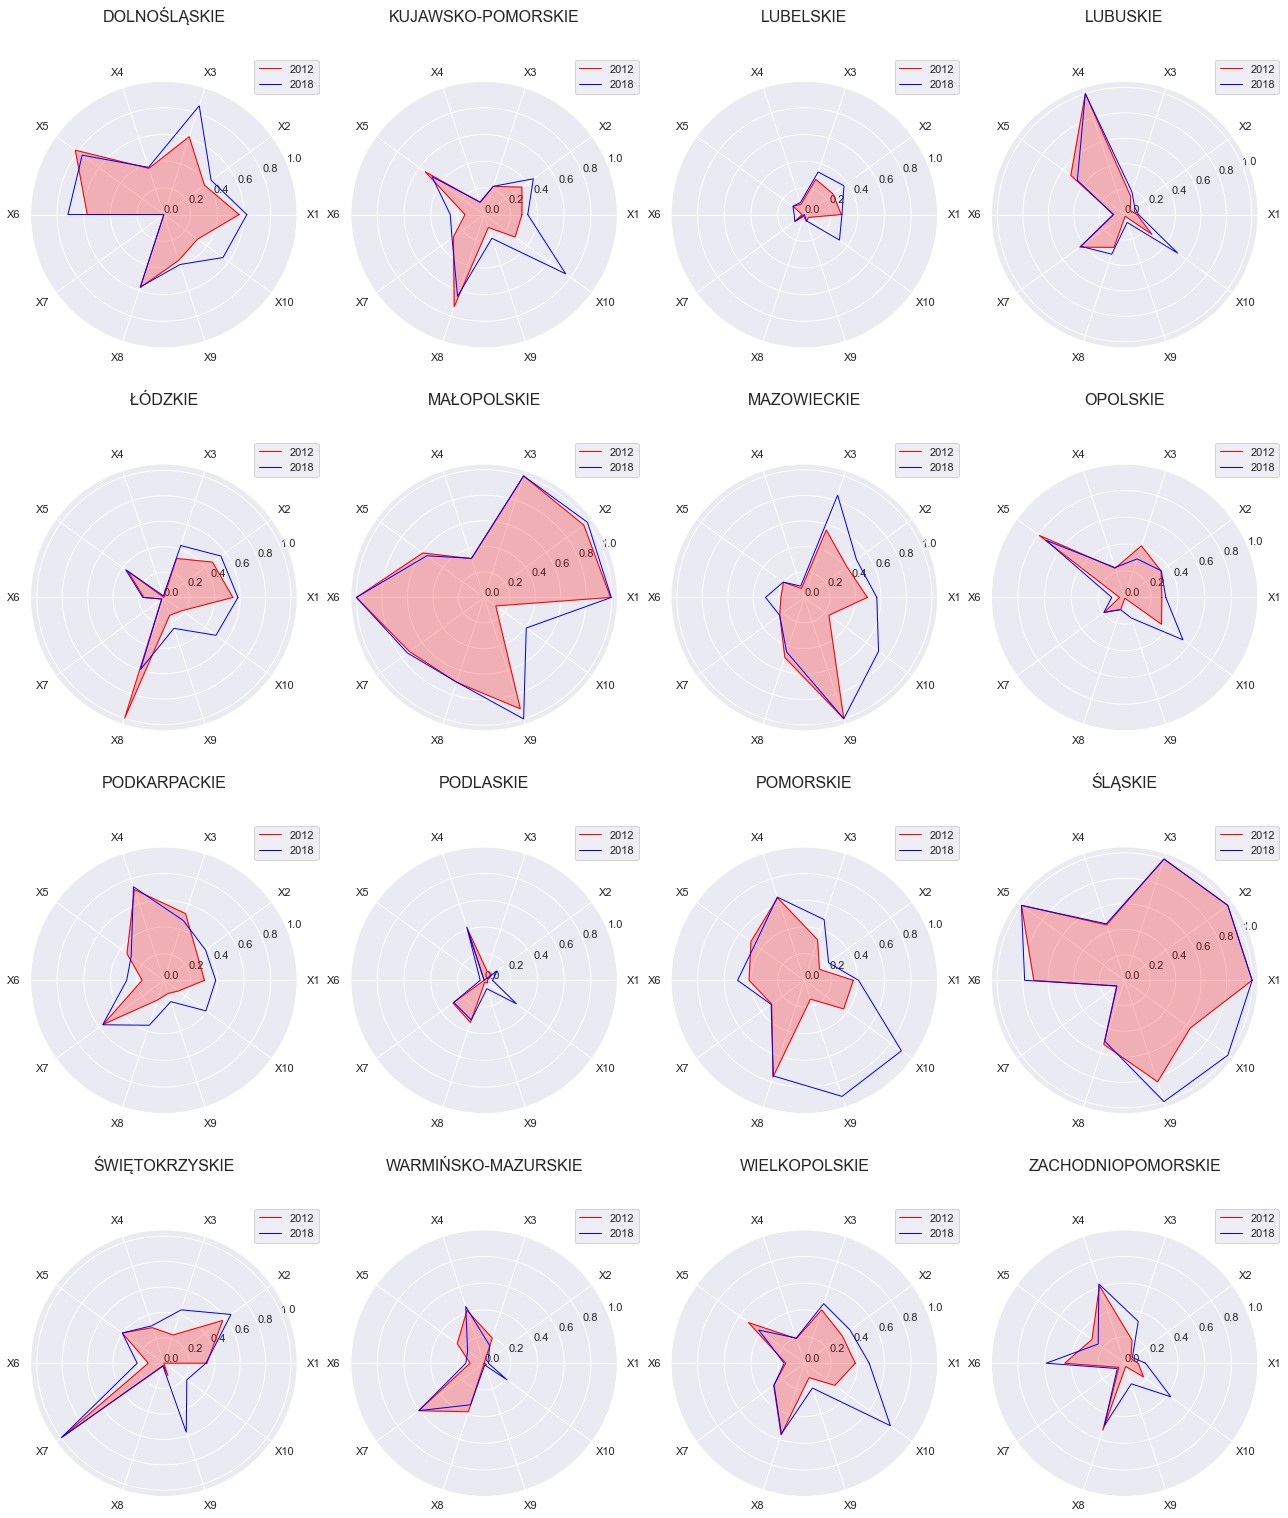

In [59]:
fig, axes = plt.subplots(4, 4, figsize = (22,27), subplot_kw=dict(polar=True))
categories = uni_data_2012.columns

for i, ax in zip(uni_data_2012.iterrows() ,fig.get_axes()):
    values = list(i)[1].tolist()
    angles = np.linspace(start = 0, stop = 2*np.pi, num = len(uni_data_2012.iloc[0]), endpoint = False).tolist()
    
    # Żeby zamknąć pętlę należy dołożyć na koniec jeszcze jedną wartość, która jest taka sama jak pierwsza
    values += values[:1]
    angles += angles[:1]
    
    ax.plot(angles, values, color='red', linewidth = 1)
    ax.fill(angles, values, color='red', alpha = 0.25)
    ax.set_rticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    
for i, ax in zip(uni_data_2018.iterrows() ,fig.get_axes()):
    values = list(i)[1].tolist()
    angles = np.linspace(start = 0, stop = 2*np.pi, num = len(uni_data_2018.iloc[0]), endpoint = False).tolist()
    
    values += values[:1]
    angles += angles[:1]
    
    # Estetyka wykresów
    ax.plot(angles, values, color='blue', linewidth = 1)
    ax.legend(labels = ['2012', '2018'], loc = 'upper right', bbox_to_anchor=(1.1, 1.1))
    ax.set_rticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_title(i[0], loc = 'center', y = 1.20)
    ax.title.set_fontsize(16)
    ax.set_thetagrids(np.degrees(angles), categories)
    


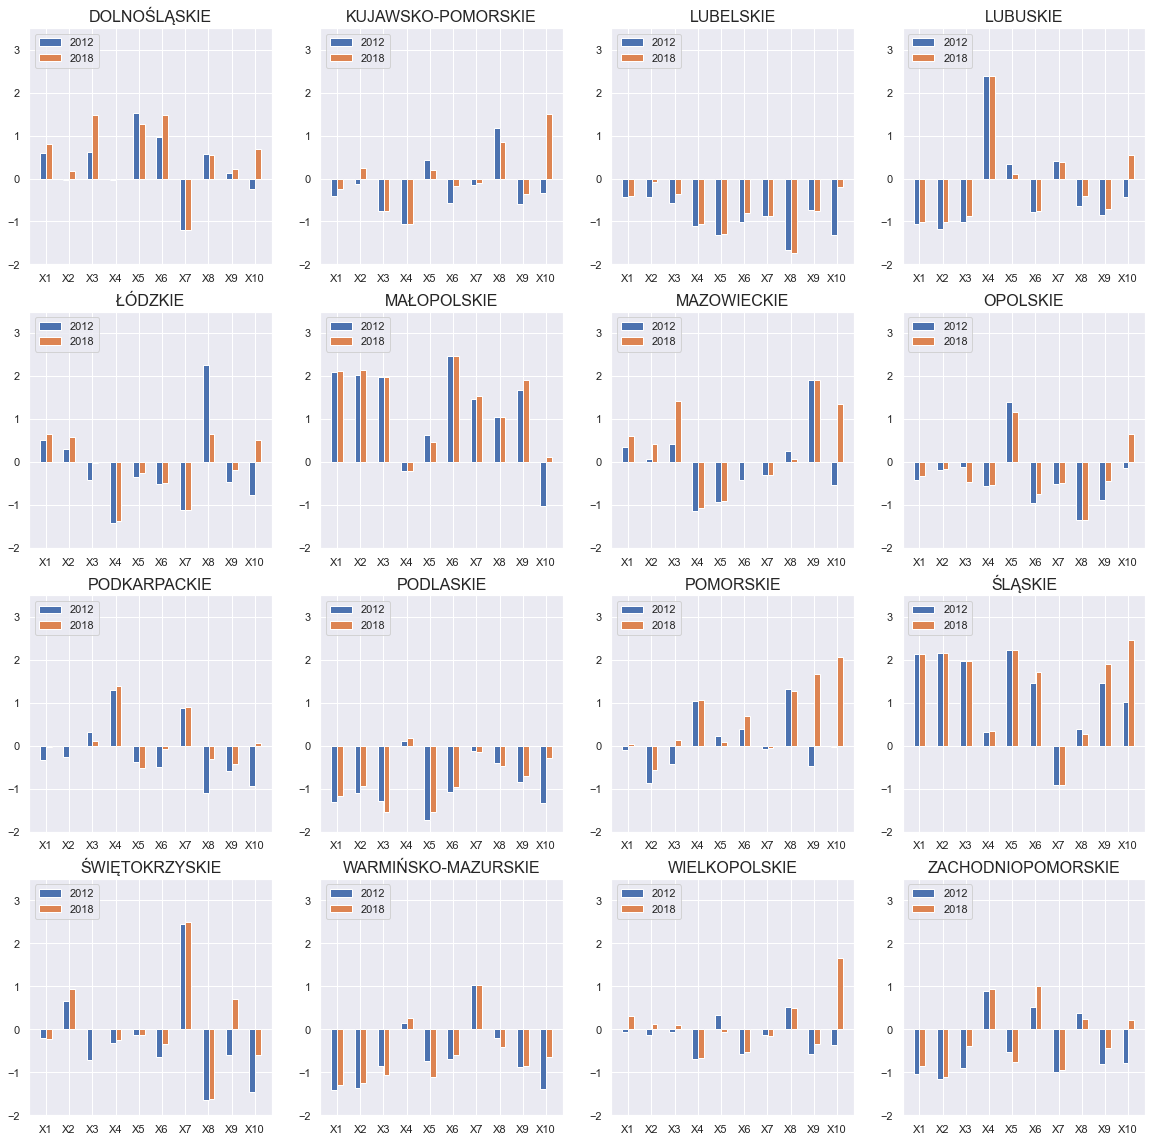

In [60]:
fig, axes = plt.subplots(4, 4, figsize = (20, 20))

categories = stand_data_2012.columns
x = np.arange(len(categories))

for i, ax in zip(stand_data_2012.iterrows(), fig.get_axes()):
    values = list(i)[1].tolist()
    ax.bar(x, values, width = 0.25)
    
    
for i, ax in zip(stand_data_2018.iterrows(), fig.get_axes()):
    values = list(i)[1].tolist()
    ax.bar(x+0.25, values, width = 0.25)
    
    ax.set_xticks([i+0.12  for i in range(10)])
    ax.set_xticklabels(categories)
    ax.set_ylim(-2,3.5)
    ax.set_title(i[0], fontsize = 16)
    ax.legend(labels = ['2012', '2018'], loc = 'upper left')

# <center> Wnioski ostateczne </center>

In [61]:
rankingi_ostateczne.sort_values(by = 'bzw_stand_2012', inplace = True)
rankingi_ostateczne['Różnica'] = rankingi_ostateczne['bzw_stand_2012'] - rankingi_ostateczne['bzw_stand_2018']
rankingi_ostateczne

,bzw_stand_2012,bzw_stand_2018,Różnica
Nazwa,,,
ŚLĄSKIE,1.0,1.0,0.0
MAŁOPOLSKIE,2.0,2.0,0.0
DOLNOŚLĄSKIE,3.0,4.0,-1.0
POMORSKIE,4.0,3.0,1.0
MAZOWIECKIE,5.0,5.0,0.0
PODKARPACKIE,6.0,6.0,0.0
WIELKOPOLSKIE,7.0,8.0,-1.0
ŁÓDZKIE,8.0,10.0,-2.0
KUJAWSKO-POMORSKIE,9.0,9.0,0.0


Najlepszym województwem pod względem atrakcyjności turystycznej w roku 2012 i 2018 okazało się województwo śląskie.  Z raportów wywnioskować można, że na przełomie 2012-2018 roku w województwie śląskim nastąpił wzrost poszczególnych wartości zmiennych przyjętych w niniejszej analizie. Wśród zmiennych, które wpłynęły na zamianę miejsc wyżej wymienionego województwa znalazły się: miejsca noclegowe na 100 km^2 oraz ścieżki rowerowe na 100 km^2. Warto zaznaczyć, że śląskie zaliczyło największy przyrost wartości tych zmiennych wśród wszystkich województw, co wpłynęło również na utrzymanie wysokiej pozycji w rankingu. Ostatecznie wśród najlepszych województw wybranych spośród rankingów są: śląskie, pomorskie, małpolskie, dolnośląskie. Województwa te na przełomie badanych lat utrzymywały się cały czas wśród topowych województw pod względem atrakcyjności turystycznej. Zauważalne są jedynie lekkie wahania pomiędzy pozycją 3, a 4.

Warto również zwrócić uwagę na województwa znajdujące się na dole obu rankingów. Wśród takich województw wymienić można: lubelskie, podlaskie, warmińsko-mazurskie. W badanym okresie znalazły się one na miejscach kolejno 16, 15, 14. Jedyna różnica jaka wystąpiła pomiędzy rokiem 2012, a rokiem 2018 to zamiana miejsc województwa lubelskiego z 16 na 15 oraz województwa podlaskiego z 15 na 16. Spowodowane to było prawdopodobnie lekkim rozrostem województwa lubelskiego pod względem ścieżek rowerowych w odniesieniu powierzchniowym do całego województwa oraz rozbudowy dróg o nawierzchni twardej.

Największe różnice w rankingach na przestrzeni badanych lat dotyczyły województwa łódzkiego (spadek z 8 miejsca na 10) oraz województwa świętokrzyskiego (wejście z 10 miejsca na 7). W przypadku pierwszego z wymienionych znaczącą rolę odegrała zmienna określająca ilość pomników przyrodu występujących na 100 km^2. Zauważony został znaczący spadek wartości tej zmiennej w roku 2018. W przypadku województwa świętokrzyskiego nastąpił wzrost wartości prawie każdej zmiennej, jednakże największą zmianę odnotowano przy zmiennej określającej ilość punktów gastronomicznych na 100 km^2. 

Wykresy, które udostępniono w raporice szczegółowo pokazują poszczególne zmiany, które zaobserwowano pomiędzy rokiem 2012, a 2018 w konkretnych województwach.

# <center> Wnioski z korelacji, wag oraz normalizacji: </center>

Dla obu zbadanych lat i sporządzonych rodzajów normalizacji najlepsza okazała się standaryzacja, a w niektórych przypadkach także unitaryzacja. Wagi także mają wpływ na wynik. W przeprowadzonej analizie wagi oparte na współczynniku korelacji okazały się gorsze niż wagi jednakowe dla każdej zmiennej. Świadczy to o tym, że korelacja ma negatywny wpływ na ważenie zmiennych. Sposób tworzenia wskaźnika syntetycznego również ma znaczenie. Dla każdej metody rankingi nieznacznie się różniły lub były takie same. Podsumuwując, grupy i rankingi dla każdej z wag, rodzaju normalizacji i metody tworzenia wskaźnika syntetycznego prawie nie różniły się między sobą, o czym świadczy wysoki wpółczynnik korelacji między każdym z rankingów wynoszący plus/minus około 0,9. Różnice w głównej mierze wynosiły +- 2 miejsca.